In [ ]:
cd '/content/drive/MyDrive/Project_dataset'

/content/drive/MyDrive/Project_dataset


In [ ]:
ls

images/  labels_dataset.csv  Projects_4.ipynb


In [ ]:
pwd

'/content/drive/MyDrive/Project_dataset'

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import regularizers, optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, MaxPooling2D, Reshape, Conv2DTranspose, UpSampling2D, Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from  tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(Conv2D)

#Load Lables CSV Collumns and Rows For Images

In [ ]:
data_labels=pd.read_csv('labels_dataset.csv')

In [ ]:
data_labels.shape

(2000, 6)

In [ ]:
data_labels.columns

Index(['Filenames', 'desert', 'mountains', 'sea', 'sunset', 'trees'], dtype='object')

In [ ]:
data_labels.head()

Filenames  desert  mountains  sea  sunset  trees
0     1.jpg       1          0    0       0      0
1     2.jpg       1          0    0       0      0
2     3.jpg       1          0    0       0      0
3     4.jpg       1          1    0       0      0
4     5.jpg       1          0    0       0      0

In [ ]:
data_labels.shape[0]

2000

In [ ]:
import cv2 
img = cv2.imread('/content/drive/MyDrive/Project_dataset/images/1.jpg')  



In [ ]:
img.max()

255

In [ ]:
img.min()

0

# Image Format for 2000 Images
1. Format Images 100pix by 100pix
2. Format images flowing labels  
2. Format from 255 = 0 to 1 images values
3. Store each processed images to array

In [ ]:
img_width = 100;
img_height = 100;
X =[]
for i in tqdm(range(data_labels.shape[0])):
  path = '/content/drive/MyDrive/Project_dataset/images/' + data_labels['Filenames'][i]
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 2000/2000 [25:17<00:00,  1.32it/s]


In [ ]:
X.shape

(2000, 100, 100, 3)

In [ ]:
X.max()

1.0

In [ ]:
X.min()

0.0

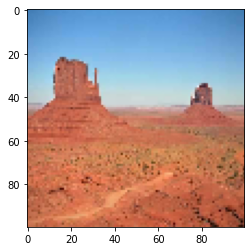

In [ ]:
plt.imshow(X[0])

In [ ]:
print(X[8])

# Format Labels by removing Filenames column and creating a Label array

In [ ]:
y = data_labels.drop(['Filenames'], axis = 1)
y = y.to_numpy()
y.shape

(2000, 5)

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
y

# Splitting Training and Testing data
1. X_train = train images, y_train = labels for images, 80% of images 
2. X_test = test images, y_test = labels for images, 20% of images 
random_state seed. same random split every time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size =0.20)

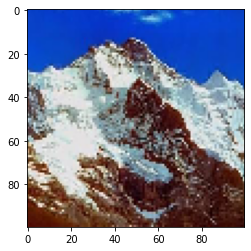

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[0]

array([0, 1, 0, 0, 0])

In [ ]:
class_names=["desert", "mountains", "sea", "sunset", "trees"]

In [ ]:
y_train

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


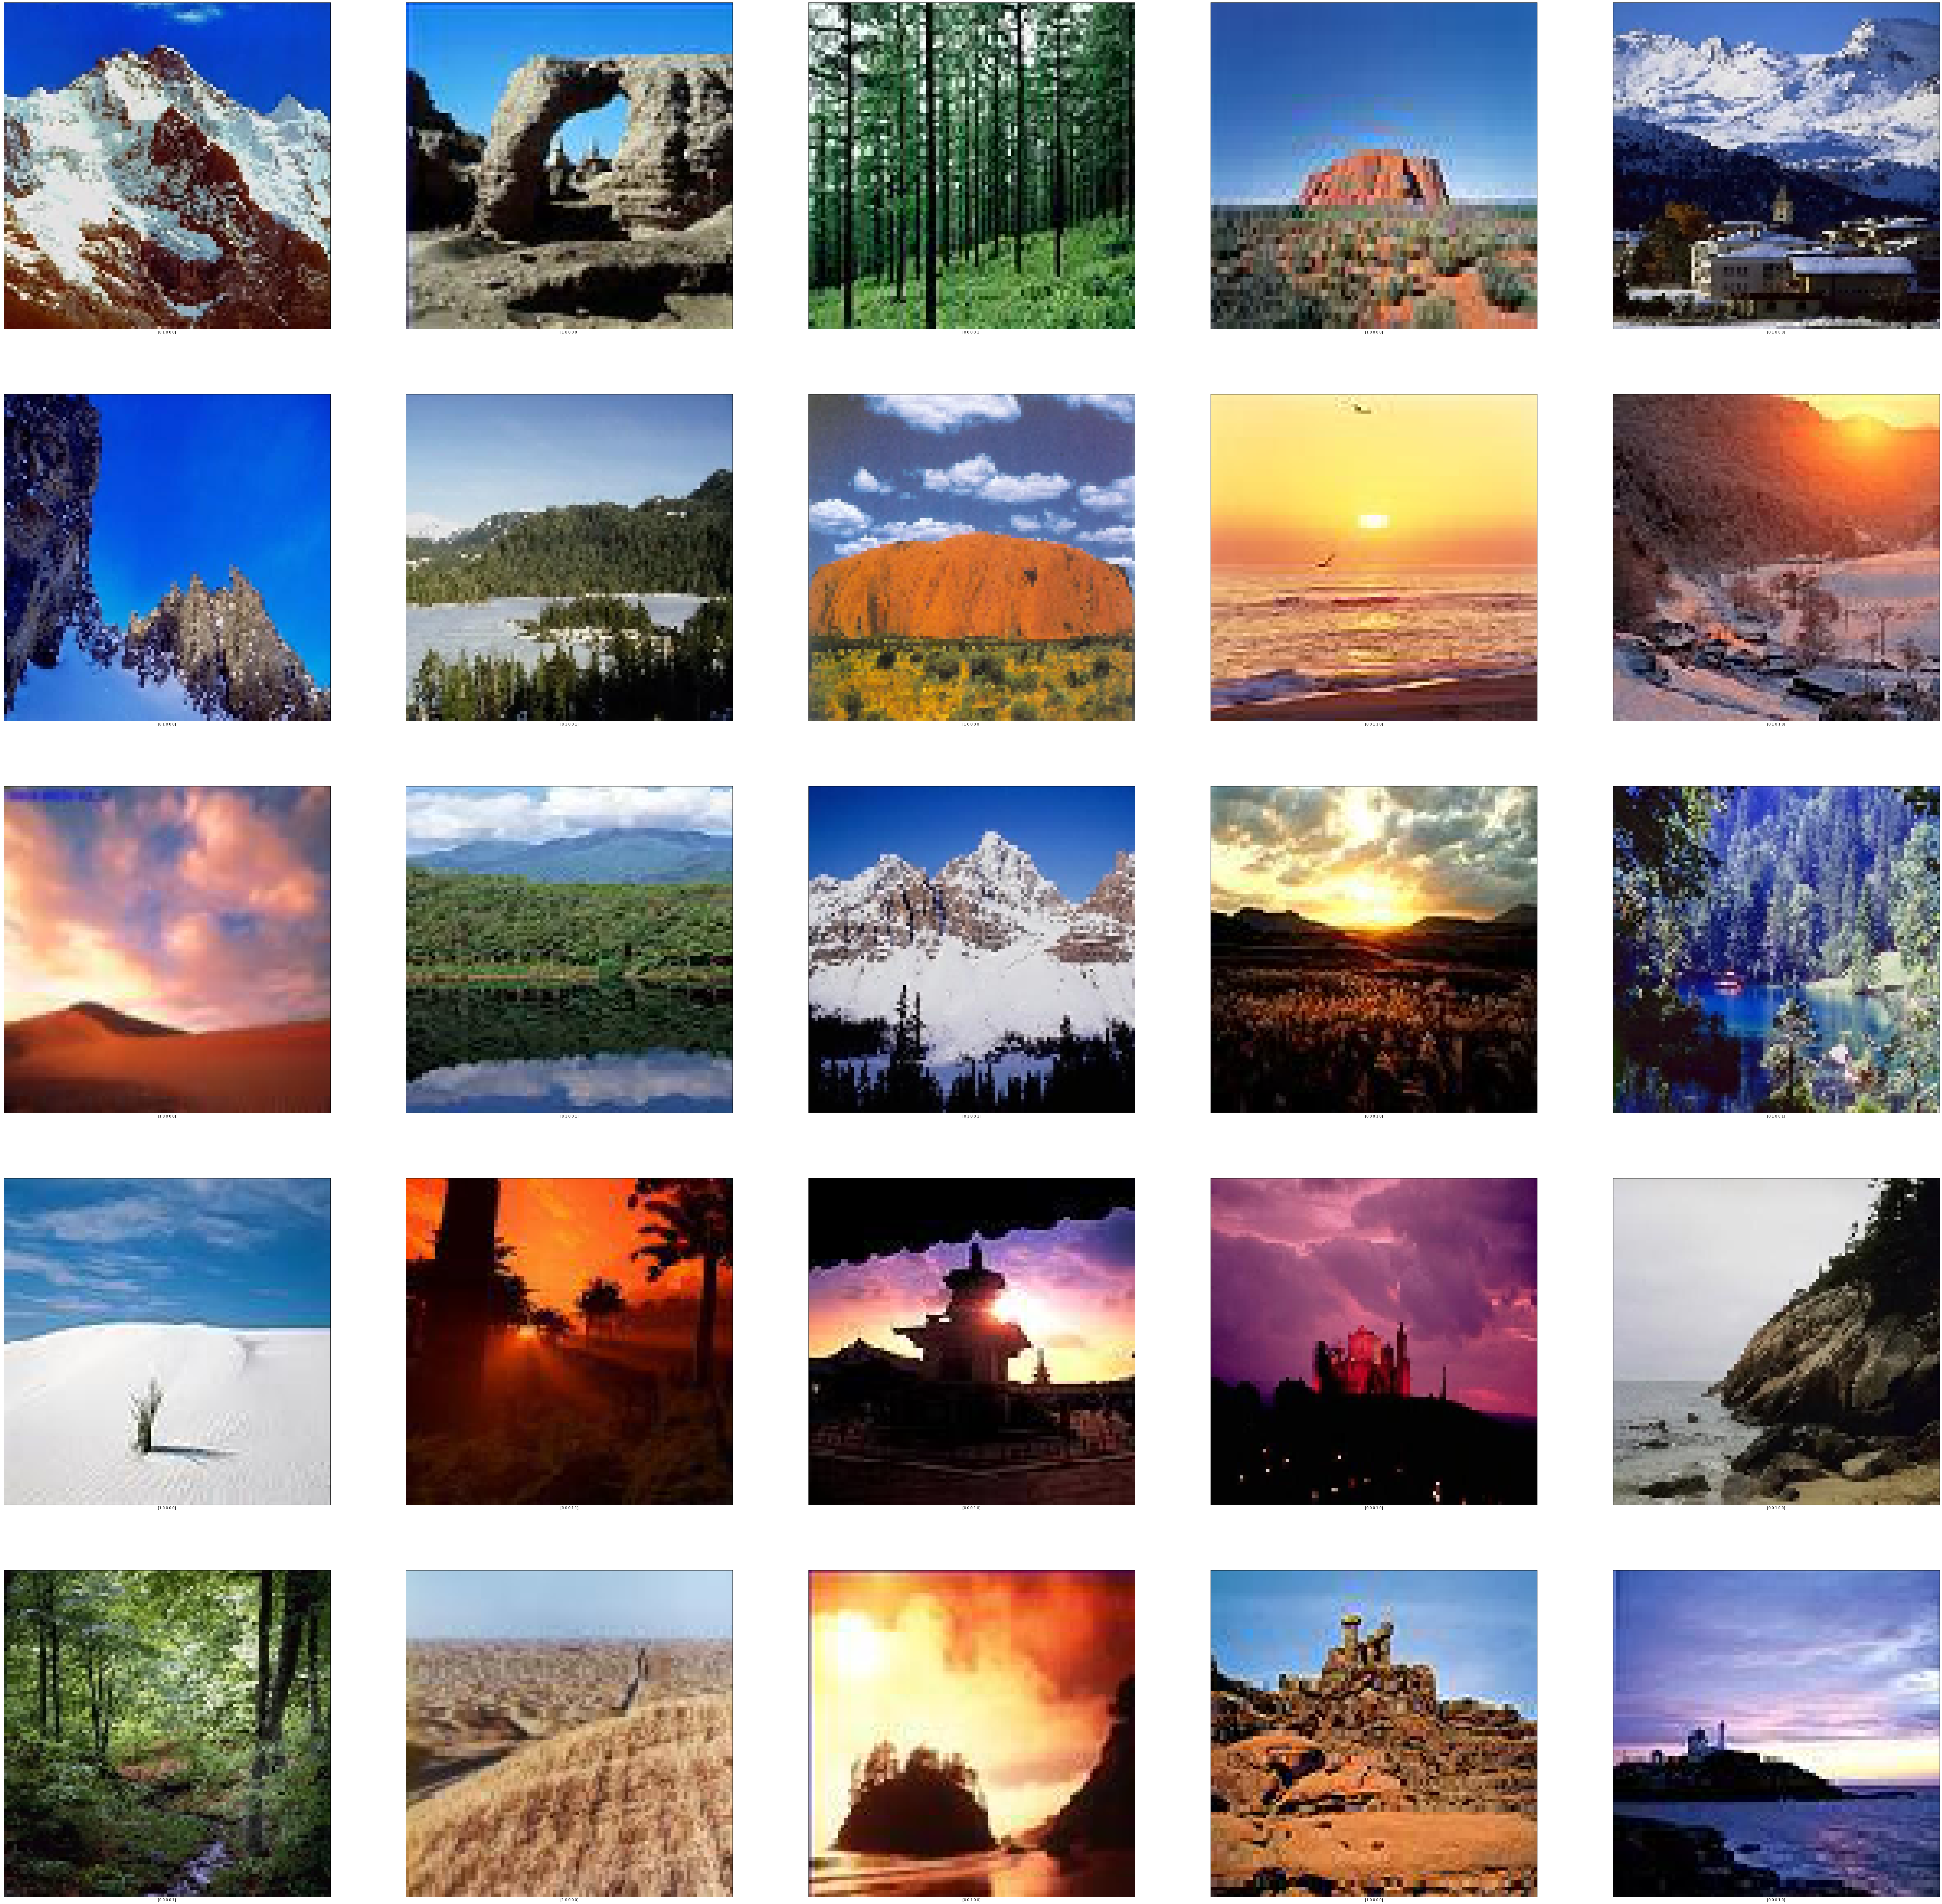

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    plt.xlabel(y_train1[i])
plt.show()

In [ ]:
X_train.shape

(1600, 100, 100, 3)

In [ ]:
y_train.shape

(1600, 5)

In [ ]:
X_test.shape

(400, 100, 100, 3)

In [ ]:
y_test.shape

(400, 5)

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
class_names=["desert", "mountains", "sea", "sunset", "trees"]

In [ ]:
#model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

# Model 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.compile( loss="binary_crossentropy",metrics=["accuracy"], optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data= (X_test,y_test))

Epoch 1/10
50/50 [==============================] - 33s 645ms/step - loss: 0.8981 - accuracy: 0.3481 - val_loss: 0.4609 - val_accuracy: 0.5125
Epoch 2/10
50/50 [==============================] - 32s 640ms/step - loss: 0.3646 - accuracy: 0.6022 - val_loss: 0.3761 - val_accuracy: 0.6075
Epoch 3/10
50/50 [==============================] - 32s 640ms/step - loss: 0.3213 - accuracy: 0.6434 - val_loss: 0.3553 - val_accuracy: 0.6375
Epoch 4/10
50/50 [==============================] - 32s 637ms/step - loss: 0.2853 - accuracy: 0.6994 - val_loss: 0.3244 - val_accuracy: 0.6750
Epoch 5/10
50/50 [==============================] - 32s 643ms/step - loss: 0.2399 - accuracy: 0.7130 - val_loss: 0.3339 - val_accuracy: 0.6425
Epoch 6/10
50/50 [==============================] - 32s 639ms/step - loss: 0.2182 - accuracy: 0.7456 - val_loss: 0.3316 - val_accuracy: 0.6625
Epoch 7/10
50/50 [==============================] - 32s 638ms/step - loss: 0.1767 - accuracy: 0.7765 - val_loss: 0.3225 - val_accuracy: 0.6575

In [ ]:
#predictions = model.predict(X_test)

# Model 2

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state = 0, test_size =0.20)

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))



model1.add(Flatten())
model1.add(Dense(512, activation='relu'))


model1.add(Dense(5, activation='sigmoid'))


model1.compile( loss="binary_crossentropy",metrics=["accuracy"], optimizer='adam')

In [ ]:
model1.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)
callbacks=[early_stop]

In [ ]:
model1.fit(X_train1, y_train1, epochs=10, validation_data= (X_test1,y_test1), callbacks=[early_stop])

Epoch 1/10
50/50 [==============================] - 44s 877ms/step - loss: 1.2999 - accuracy: 0.2914 - val_loss: 0.4853 - val_accuracy: 0.4525
Epoch 2/10
50/50 [==============================] - 32s 639ms/step - loss: 0.3722 - accuracy: 0.5992 - val_loss: 0.4383 - val_accuracy: 0.5700
Epoch 3/10
50/50 [==============================] - 32s 641ms/step - loss: 0.3348 - accuracy: 0.6282 - val_loss: 0.3718 - val_accuracy: 0.6400
Epoch 4/10
50/50 [==============================] - 32s 639ms/step - loss: 0.2811 - accuracy: 0.7084 - val_loss: 0.3681 - val_accuracy: 0.6350
Epoch 5/10
50/50 [==============================] - 32s 638ms/step - loss: 0.2723 - accuracy: 0.6902 - val_loss: 0.3633 - val_accuracy: 0.6250
Epoch 6/10
50/50 [==============================] - 32s 637ms/step - loss: 0.2418 - accuracy: 0.7250 - val_loss: 0.3410 - val_accuracy: 0.6275
Epoch 7/10
50/50 [==============================] - 32s 637ms/step - loss: 0.2090 - accuracy: 0.7346 - val_loss: 0.3433 - val_accuracy: 0.6375

# Predict

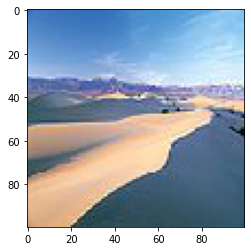

In [ ]:
input_img1 = image.load_img('/content/a.jpg', target_size=(img_width, img_height, 3))
plt.imshow(input_img1);
input_img1 = image.img_to_array(input_img1)
input_img1 = input_img1/255.0
input_img1 = input_img1.reshape(1, img_width, img_height, 3)

In [ ]:
predictions_single1 = model1.predict(input_img1)
class_names=["desert", "mountains", "sea", "sunset", "trees"]
print(predictions_single1)

[[0.6751816  0.24869338 0.4578751  0.06593245 0.15390703]]


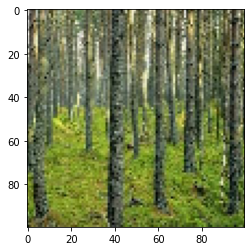

In [ ]:
input_img2 = image.load_img('/content/b.jpg', target_size=(img_width, img_height, 3))
plt.imshow(input_img2);
input_img2 = image.img_to_array(input_img2)
input_img2 = input_img2/255.0
input_img2 = input_img2.reshape(1, img_width, img_height, 3)

In [ ]:
predictions_single2 = model1.predict(input_img2)
class_names=["desert", "mountains", "sea", "sunset", "trees"]
print(predictions_single2)

[[2.1336079e-03 5.4234266e-04 2.8204918e-04 3.2483083e-05 9.9850410e-01]]


In [ ]:
model1.evaluate(X_test1, y_test1)

13/13 [==============================] - 2s 140ms/step - loss: 0.3433 - accuracy: 0.6375


[0.34325408935546875, 0.637499988079071]

In [ ]:
x_new = X_test1[:4]
y_proba = model1.predict(x_new)
y_proba.round(2)

array([[0.11, 0.83, 0.25, 0.01, 0.18],
       [0.02, 0.1 , 0.68, 0.24, 0.1 ],
       [0.09, 0.  , 0.97, 0.1 , 0.09],
       [0.2 , 0.63, 0.02, 0.  , 0.5 ]], dtype=float32)

In [ ]:
a_test = np.argsort(y_proba[0])[:-3:-1]
a_test

array([1, 2])

In [ ]:
classes = data_labels.columns[1:]
classes

Index(['desert', 'mountains', 'sea', 'sunset', 'trees'], dtype='object')

In [ ]:
for i in range(2):
  print(classes[top[i]])

mountains
sea


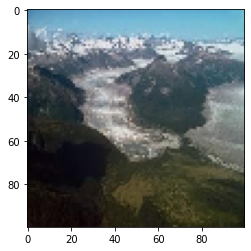

In [ ]:
plt.imshow(X_test[0])

In [ ]:
plt.imshow(X_test[1])

In [ ]:
plt.imshow(X_test[2])

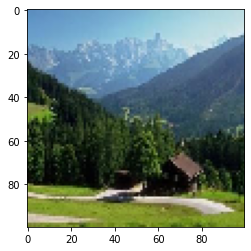

In [ ]:
plt.imshow(X_test[3])

In [ ]:
predictions = model1.predict(input_img2)
predictions

array([[2.1336079e-03, 5.4234266e-04, 2.8204918e-04, 3.2483083e-05,
        9.9850410e-01]], dtype=float32)

In [ ]:
top = np.argsort(predictions[0])[:-3:-1]
top

array([4, 0])

In [ ]:
classes = data_labels.columns[1:]
classes

Index(['desert', 'mountains', 'sea', 'sunset', 'trees'], dtype='object')

In [ ]:
for i in range(2):
  print(classes[top[i]])

trees
desert


# AUTO ENCODER

In [ ]:
input_layer = Input(shape=(100,100,3), name="INPUT")
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2,2),name="CODE")(x)

x = Conv2DTranspose(64, (3,3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2,2))(x)
x = Conv2DTranspose(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3,(3,3), padding='same', name="OUTPUT")(x)

In [ ]:
ae_test1 = Model(input_layer, output_layer)
ae_test1.compile(optimizer='adam', loss='mse')
ae_test1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
CODE (MaxPooling2D)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 25, 25, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 50, 50, 64)        0     

In [ ]:
ae_test1.fit(X_train1, X_train1,epochs=10, validation_data=(X_test1, X_test1))

Epoch 1/10
50/50 [==============================] - 66s 1s/step - loss: 0.0671 - val_loss: 0.0130
Epoch 2/10
50/50 [==============================] - 65s 1s/step - loss: 0.0118 - val_loss: 0.0101
Epoch 3/10
50/50 [==============================] - 65s 1s/step - loss: 0.0092 - val_loss: 0.0082
Epoch 4/10
50/50 [==============================] - 65s 1s/step - loss: 0.0081 - val_loss: 0.0076
Epoch 5/10
50/50 [==============================] - 65s 1s/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/10
50/50 [==============================] - 65s 1s/step - loss: 0.0073 - val_loss: 0.0069
Epoch 7/10
50/50 [==============================] - 65s 1s/step - loss: 0.0071 - val_loss: 0.0067
Epoch 8/10
50/50 [==============================] - 65s 1s/step - loss: 0.0066 - val_loss: 0.0065
Epoch 9/10
50/50 [==============================] - 65s 1s/step - loss: 0.0067 - val_loss: 0.0063
Epoch 10/10
50/50 [==============================] - 65s 1s/step - loss: 0.0064 - val_loss: 0.0062


In [ ]:
get_encoded = Model(inputs=ae_test1.input, outputs=ae_test1.get_layer("CODE").output)


In [ ]:
enc = get_encoded.predict(X_test1)
#enc = enc.reshape((len(X_test1), 32*64*64))
enc.shape

(400, 25, 25, 64)

In [ ]:
reconstructed = ae_test1.predict(X_test1)

In [ ]:
show_a()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

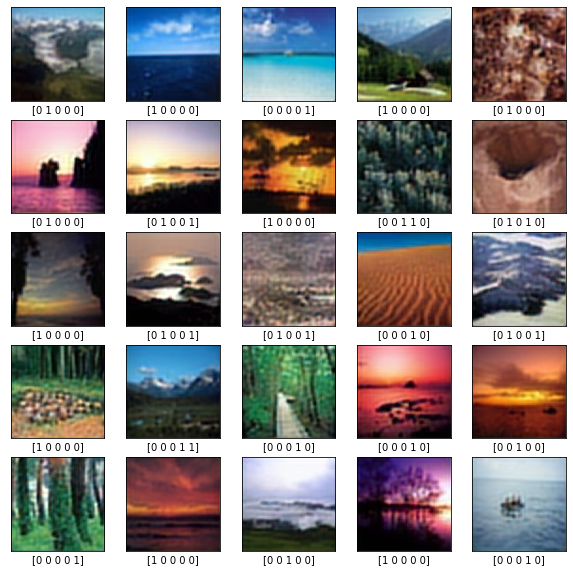

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reconstructed[i], cmap=plt.cm.binary)
    plt.xlabel(y_train1[i])
plt.show()